In [21]:
#EDA_1.ipynb
import pandas as pd

# Cargar archivos CSV
file_paths = ["../dataset/2015.csv", "../dataset/2016.csv", "../dataset/2017.csv", "../dataset/2018.csv", "../dataset/2019.csv"]
data_frames = [pd.read_csv(file) for file in file_paths]

In [22]:
# Renombrar columnas y unificar datasets
for i, df in enumerate(data_frames):
    year = 2015 + i
    df['Year'] = year
    if year == 2015:
        df.columns = ["Country", "Region", "Happiness Rank", "Happiness Score", "Standard Error",
                      "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
                      "Trust (Government Corruption)", "Generosity", "Dystopia Residual", "Year"]
    elif year == 2016:
        df.columns = ["Country", "Region", "Happiness Rank", "Happiness Score",
                      "Lower Confidence Interval", "Upper Confidence Interval",
                      "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
                      "Trust (Government Corruption)", "Generosity", "Dystopia Residual", "Year"]
    elif year == 2017:
        df.columns = ["Country", "Happiness Rank", "Happiness Score", "Whisker High", "Whisker Low",
                      "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
                      "Generosity", "Trust (Government Corruption)", "Dystopia Residual", "Year"]
    elif year in [2018, 2019]:
        df.columns = ["Happiness Rank", "Country", "Happiness Score", "Economy (GDP per Capita)", 
                      "Family", "Health (Life Expectancy)", "Freedom", "Generosity", 
                      "Trust (Government Corruption)", "Year"]

combined_data = pd.concat(data_frames, ignore_index=True, sort=False)

# Imputar valores nulos en "Dystopia Residual" y "Trust (Government Corruption)"
combined_data["Dystopia Residual"] = combined_data["Dystopia Residual"].fillna(combined_data["Dystopia Residual"].median())
combined_data["Trust (Government Corruption)"] = combined_data["Trust (Government Corruption)"].fillna(combined_data["Trust (Government Corruption)"].median())



In [23]:
# Resumen estadístico
print(combined_data.describe())

       Happiness Rank  Happiness Score  Standard Error  \
count      782.000000       782.000000      158.000000   
mean        78.698210         5.379018        0.047885   
std         45.182384         1.127456        0.017146   
min          1.000000         2.693000        0.018480   
25%         40.000000         4.509750        0.037268   
50%         79.000000         5.322000        0.043940   
75%        118.000000         6.189500        0.052300   
max        158.000000         7.769000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                782.000000  782.000000                782.000000   
mean                   0.916047    1.078392                  0.612416   
std                    0.407340    0.329548                  0.248309   
min                    0.000000    0.000000                  0.000000   
25%                    0.606500    0.869363                  0.440183   
50%                    0.982205    1.12

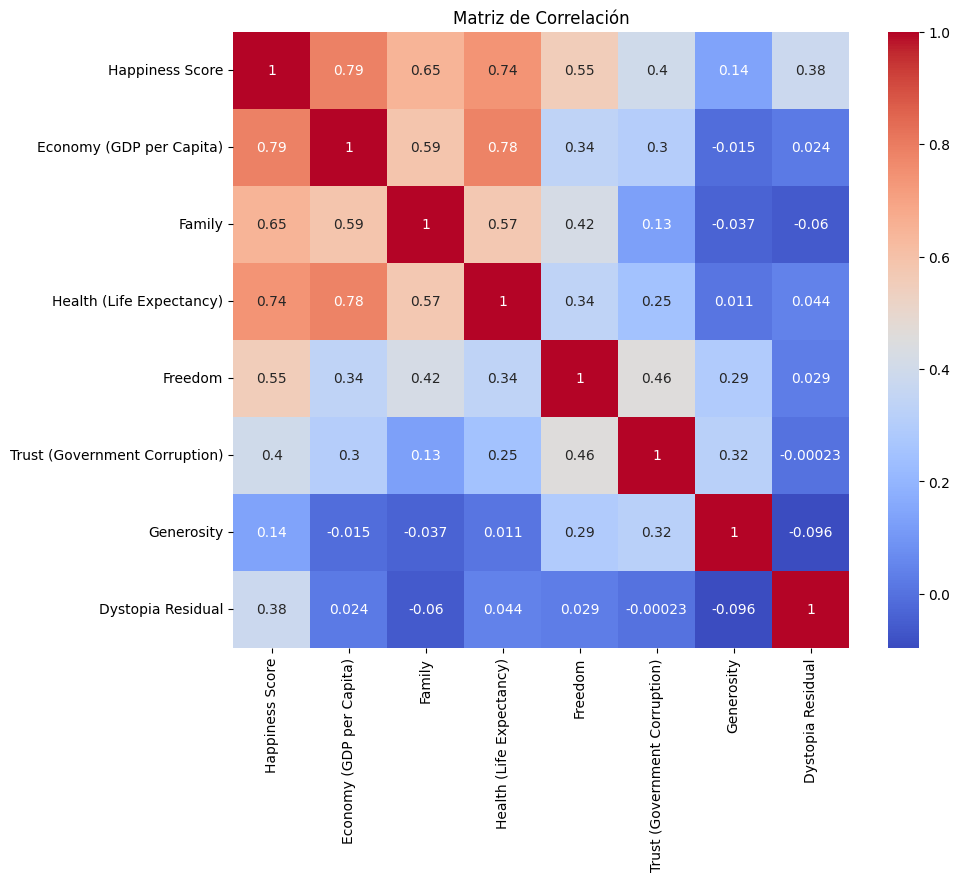

In [24]:
# Correlación entre características
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = combined_data[["Happiness Score", "Economy (GDP per Capita)", "Family",
                                    "Health (Life Expectancy)", "Freedom",
                                    "Trust (Government Corruption)", "Generosity", "Dystopia Residual"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Matriz de Correlación")
plt.show()


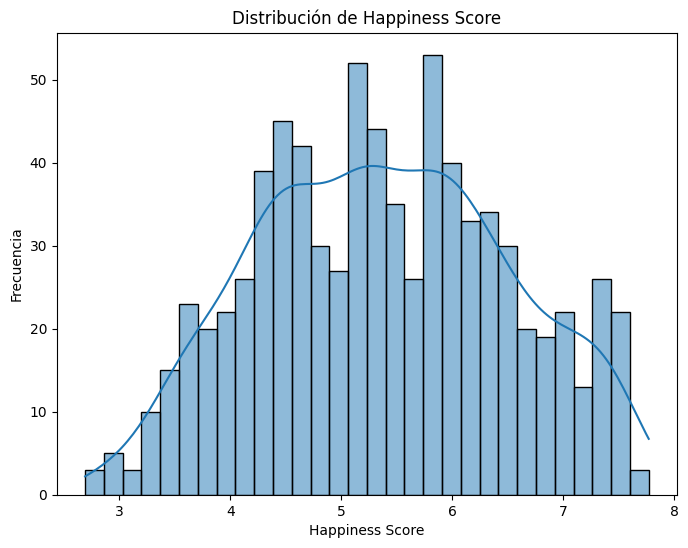

In [15]:
# Distribución de la variable objetivo "Happiness Score"
plt.figure(figsize=(8, 6))
sns.histplot(combined_data["Happiness Score"], bins=30, kde=True)
plt.title("Distribución de Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Frecuencia")
plt.show()

In [29]:

# Borra columnas con valores nulos en el DataFrame
combined_data.drop(columns=["Region", "Standard Error","Lower Confidence Interval","Upper Confidence Interval","Whisker High","Whisker Low"], inplace=True)


In [30]:
# Guardar el dataset limpio
combined_data.to_csv("../dataset/cleaned_data.csv", index=False)
print("Dataset combinado, valores nulos imputados, y guardado.")

Dataset combinado, valores nulos imputados, y guardado.


In [31]:
combined_data.head(10)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015
